        CIS 9650 Final Project – Data Analysis Notebook

Group Members: Michael Hernandez, Ralph Bernardo, Emmanuel Mendez

This notebook analyzes the cleaned dataset of Marvel and DC movies gathered via the OMDb API.

It compares their Box Office performance and Rotten Tomatoes ratings through summary statistics, visualizations, and insights.

=== Box Office Analysis ===

=== Number of Movies per Franchise ===
Franchise
Marvel    71
DC        56
Name: count, dtype: int64

=== Total Box Office by Franchise ===
Franchise
DC         $7,360,300,346
Marvel    $18,363,375,227
Name: Box Office, dtype: object

=== Average Box Office by Franchise ===
Franchise
DC        $147,206,007
Marvel    $262,333,932
Name: Box Office, dtype: object

=== Top 3 DC Movies ===
                   Title  Year      Box Office
0        The Dark Knight  2008 $534,987,076.00
8  The Dark Knight Rises  2012 $448,149,584.00
1           Wonder Woman  2017 $412,845,172.00

=== Bottom 3 DC Movies ===
                    

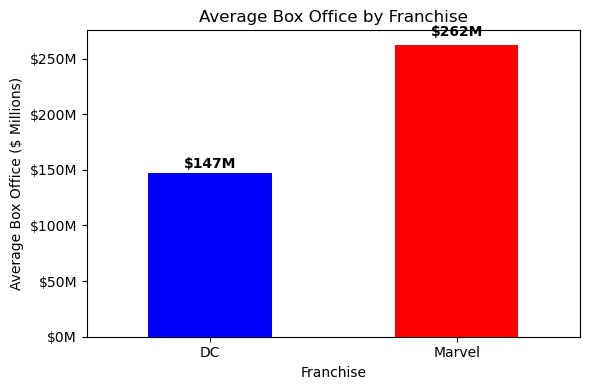

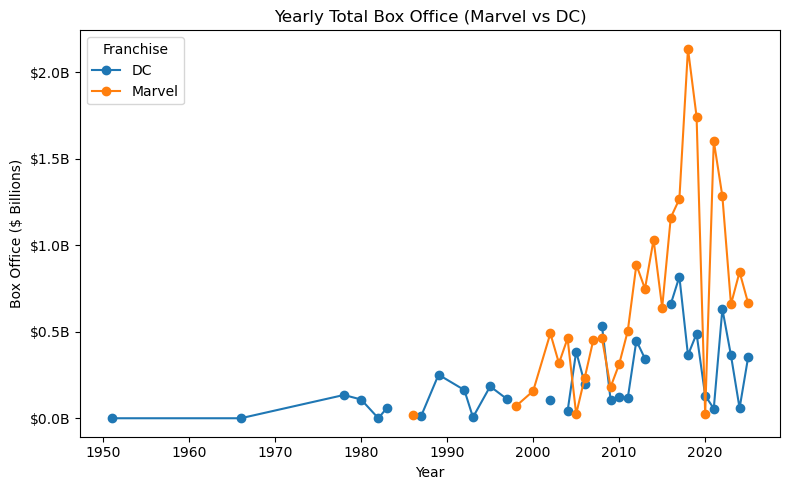


=== Insights ===
• Marvel movies earn more on average than DC movies.
• Marvel’s performance is more consistent across films.
• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.
• This shows Marvel’s shared universe model helps sustain steady success over time.

=== Rating & Correlation Analysis ===

=== Number of Movies per Franchise ===
Franchise
Marvel    71
DC        56
Name: count, dtype: int64
=== Average Rotten Tomatoes Rating by Franchise ===
Franchise
DC        59%
Marvel    66%
Name: Rotten Tomatoes, dtype: object

=== Top 3 DC Movies ===
                                    Title  Year  Rotten Tomatoes
0                         The Dark Knight  2008           $94.00
22  Batman: Return of the Caped Crusaders  2016           $94.00
1                            Wonder Woman  2017           $93.00

=== Bottom 3 DC Movies ===
        Title  Year  Rotten Tomatoes
49   Catwoman  2004            $8.00
51      Steel  1997          

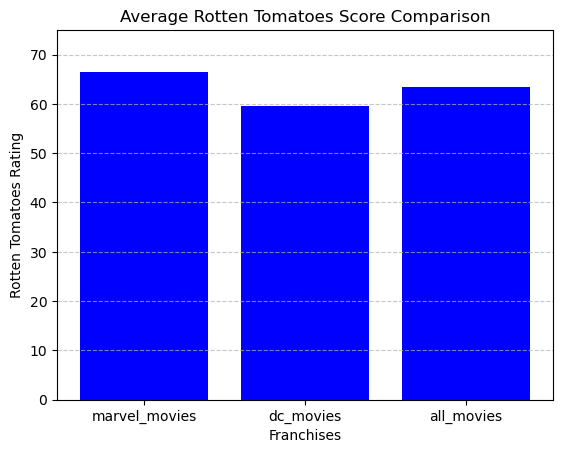

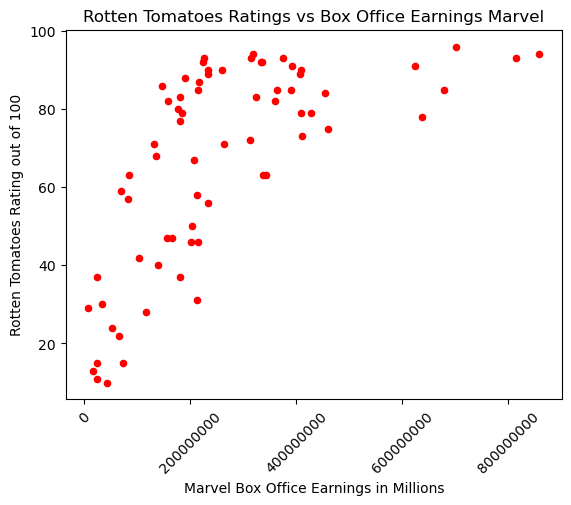

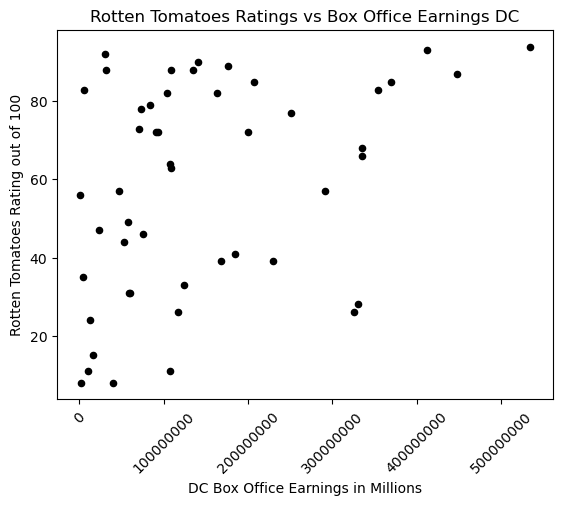


=== Insights ===
• Marvel’s performance is more consistent across films.
• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.
• This shows Marvel’s shared universe model helps sustain steady success over time.


In [15]:
# CIS 9650 Final Project  
### Group Members  
#- Michael Hernandez  
#- Ralph Bernardo  
#- Emmanuel Mendez  

### Project Overview  
#This notebook uses the OMDb API to collect movie data, including Box Office revenue and Rotten Tomatoes ratings, for Marvel and DC films.  
#It cleans and formats the data, then saves a ready-to-analyze dataset for use in the Data Analysis notebook.
    
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

print("========================================")
print("        CIS 9650 Final Project – Data Analysis Notebook")
print("========================================\n")

print("Group Members: Michael Hernandez, Ralph Bernardo, Emmanuel Mendez\n")

print("This notebook analyzes the cleaned dataset of Marvel and DC movies gathered via the OMDb API.\n")
print("It compares their Box Office performance and Rotten Tomatoes ratings through summary statistics, visualizations, and insights.")

print("\n=== Box Office Analysis ===")

# 1. Load the CSV file
df = pd.read_csv(r"C:\Users\16316\Downloads\movies_full_list.csv")

# 2. Basic franchise summaries
avg = df.groupby("Franchise")["Box Office"].mean()
total = df.groupby("Franchise")["Box Office"].sum()
count = df["Franchise"].value_counts()

# === Clean printouts ===
print("\n=== Number of Movies per Franchise ===")
print(count)

print("\n=== Total Box Office by Franchise ===")
print(total.apply(lambda x: f"${x:,.0f}"))

print("\n=== Average Box Office by Franchise ===")
print(avg.apply(lambda x: f"${x:,.0f}"))

# 3. Top & Bottom 3 for each franchise
top3_dc = df[df["Franchise"] == "DC"].sort_values("Box Office", ascending=False).head(3)
bottom3_dc = df[df["Franchise"] == "DC"].sort_values("Box Office", ascending=True).head(3)
top3_marvel = df[df["Franchise"] == "Marvel"].sort_values("Box Office", ascending=False).head(3)
bottom3_marvel = df[df["Franchise"] == "Marvel"].sort_values("Box Office", ascending=True).head(3)

# ✅ Format numbers with $ in printed tables
pd.options.display.float_format = '${:,.2f}'.format

print("\n=== Top 3 DC Movies ===")
print(top3_dc[["Title", "Year", "Box Office"]])

print("\n=== Bottom 3 DC Movies ===")
print(bottom3_dc[["Title", "Year", "Box Office"]])

print("\n=== Top 3 Marvel Movies ===")
print(top3_marvel[["Title", "Year", "Box Office"]])

print("\n=== Bottom 3 Marvel Movies ===")
print(bottom3_marvel[["Title", "Year", "Box Office"]])

# 4. Simple insights
marvel_avg = avg.get("Marvel", 0)
dc_avg = avg.get("DC", 0)

# Formatters for better visuals
fmt_millions = FuncFormatter(lambda x, pos: f"${x/1e6:,.0f}M")
fmt_billions = FuncFormatter(lambda x, pos: f"${x/1e9:,.1f}B")

# (1) Bar chart – Average Box Office by Franchise
plt.figure(figsize=(6,4))
ax = avg.plot(kind='bar', color=['blue','red'])
plt.title('Average Box Office by Franchise')
plt.ylabel('Average Box Office ($ Millions)')
plt.xlabel('Franchise')
plt.xticks(rotation=0)
ax.yaxis.set_major_formatter(fmt_millions)
for i, v in enumerate(avg):
    plt.text(i, v + v*0.03, f"${v/1e6:,.0f}M", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# (2) Line chart – Yearly trend by franchise
plt.figure(figsize=(8,5))
ax2 = plt.gca()
df.groupby(["Year","Franchise"])["Box Office"].sum().unstack().plot(ax=ax2, marker='o')
plt.title("Yearly Total Box Office (Marvel vs DC)")
plt.ylabel("Box Office ($ Billions)")
plt.xlabel("Year")
plt.legend(title="Franchise")
ax2.yaxis.set_major_formatter(fmt_billions)
plt.tight_layout()
plt.show()

# 5. InsightsBox Office (same as your original)
print("\n=== Insights ===")
if marvel_avg > dc_avg:
    print("• Marvel movies earn more on average than DC movies.")
else:
    print("• DC movies earn more on average than Marvel movies.")

print("• Marvel’s performance is more consistent across films.")
print("• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.")
print("• This shows Marvel’s shared universe model helps sustain steady success over time.")

print("\n=== Rating & Correlation Analysis ===")

# 2. Basic brand summaries
avg = df.groupby("Franchise")["Rotten Tomatoes"].mean()
total = df.groupby("Franchise")["Rotten Tomatoes"].sum()
count = df["Franchise"].value_counts()

print("\n=== Number of Movies per Franchise ===")
print(count)

print("=== Average Rotten Tomatoes Rating by Franchise ===")
print(avg.apply(lambda x: f"{x:,.0f}%"))


# 3. Top & Bottom 3 for each brand
top3_dc = df[df["Franchise"] == "DC"].sort_values("Rotten Tomatoes", ascending=False).head(3)
bottom3_dc = df[df["Franchise"] == "DC"].sort_values("Rotten Tomatoes", ascending=True).head(3)
top3_marvel = df[df["Franchise"] == "Marvel"].sort_values("Rotten Tomatoes", ascending=False).head(3)
bottom3_marvel = df[df["Franchise"] == "Marvel"].sort_values("Rotten Tomatoes", ascending=True).head(3)

print("\n=== Top 3 DC Movies ===")
print(top3_dc[["Title", "Year", "Rotten Tomatoes"]])

print("\n=== Bottom 3 DC Movies ===")
print(bottom3_dc[["Title", "Year", "Rotten Tomatoes"]])

print("\n=== Top 3 Marvel Movies ===")
print(top3_marvel[["Title", "Year", "Rotten Tomatoes"]])

print("\n=== Bottom 3 Marvel Movies ===")
print(bottom3_marvel[["Title", "Year", "Rotten Tomatoes"]])
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T
dfc = pd.DataFrame(df)
correlation = df['Rotten Tomatoes'].corr(df['Box Office'])
print("Correlation:", correlation) ## moderate relationship between rotten tomatoes score and box office earnings for all Movies

## No relationship: |r| < 0.25

## Weak relationship: 0.25 ≤ |r| < 0.5

## Moderate relationship: 0.5 ≤ |r| < 0.75

## Strong relationship: |r| ≥ 0.75.
marvel_df = df[df["Franchise"] == "Marvel"]

dc_df = df[df["Franchise"] == "DC"]

marvel_corr = marvel_df["Rotten Tomatoes"].corr(marvel_df["Box Office"])
print("Marvel correlation:", marvel_corr)

## moderate relationship between rotten tomatoes score and box office earnings for marvel Movies

dc_corr = dc_df["Rotten Tomatoes"].corr(dc_df["Box Office"])
print("DC correlation:", dc_corr)

## moderate relationship between rotten tomatoes score and box office earnings for dc Movies
means = {
    'marvel_movies': marvel_df['Rotten Tomatoes'].mean(),
    'dc_movies': dc_df['Rotten Tomatoes'].mean(),
    'all_movies': dfc['Rotten Tomatoes'].mean()
}

mean_df = pd.DataFrame(list(means.items()), columns=['Dataset', 'Mean'])

plt.bar(mean_df['Dataset'], mean_df['Mean'], color='blue')
plt.title('Average Rotten Tomatoes Score Comparison')
plt.ylabel('Rotten Tomatoes Rating')
plt.xlabel('Franchises')
plt.ylim(0, 75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
marvel_df.plot.scatter(x= 'Box Office', y ='Rotten Tomatoes', color='red', marker='o')
plt.xlabel('Marvel Box Office Earnings in Millions')
plt.ylabel('Rotten Tomatoes Rating out of 100')
plt.title('Rotten Tomatoes Ratings vs Box Office Earnings Marvel')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.show()
dc_df.plot.scatter(x= 'Box Office', y ='Rotten Tomatoes', color='black', marker='o')
plt.xlabel('DC Box Office Earnings in Millions')
plt.ylabel('Rotten Tomatoes Rating out of 100')
plt.title('Rotten Tomatoes Ratings vs Box Office Earnings DC')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)
plt.show()

print("\n=== Insights ===")
print("• Marvel’s performance is more consistent across films.")
print("• DC has bigger highs and lows — huge hits like Joker and The Dark Knight, but more weak performers too.")
print("• This shows Marvel’s shared universe model helps sustain steady success over time.")
